In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# READING THE FILE 

In [2]:
df=pd.read_csv("/kaggle/input/used-mobile-price/used_device_data.csv")
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


# INFO OF THE DATAFRAME

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

# CHECKING NULL VALUES

In [4]:
arr=df.columns
arr

Index(['device_brand', 'os', 'screen_size', '4g', '5g', 'rear_camera_mp',
       'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

In [5]:
for i in arr:
    print(i,":",df[i].isnull().sum())

device_brand : 0
os : 0
screen_size : 0
4g : 0
5g : 0
rear_camera_mp : 179
front_camera_mp : 2
internal_memory : 4
ram : 4
battery : 6
weight : 7
release_year : 0
days_used : 0
normalized_used_price : 0
normalized_new_price : 0


# FROM THE ABOVE PROCESS WE GOT THAT NEARLY 7 COLUMNS HAVING NULL VALUES WE NEED TO REPLACE IT BY MEAN OR MEDIAN OR MODE 


In [6]:
m1=df["rear_camera_mp"].mean()
m1

9.460207633587787

rear_camera_mp null values are removed

In [7]:
df['rear_camera_mp'].fillna(value=m1, inplace=True)
df["rear_camera_mp"].isnull().sum()

0

front_camera_mp null values are removed

In [8]:
m2=df["front_camera_mp"].mean()
m2
df["front_camera_mp"].fillna(value=m2,inplace=True)
df["front_camera_mp"].isnull().sum()

0

internal_memory null values are removed

In [9]:
m3=df["internal_memory"].mean()
m3
df["internal_memory"].fillna(value=m3,inplace=True)
df["internal_memory"].isnull().sum()

0

ram null values are removed

In [10]:
m4=df["ram"].mean()
m4
df["ram"].fillna(value=m4,inplace=True)
df["ram"].isnull().sum()

0

battery null values are removed

In [11]:
m5=df["battery"].mean()
m5
df["battery"].fillna(value=m5,inplace=True)
df["battery"].isnull().sum()

0

weight null values are removed

In [12]:
m6=df["weight"].mean()
m6
df["weight"].fillna(value=m6,inplace=True)
df["weight"].isnull().sum()

0

ALL THE NULL VALUES ARE CLEARD

# PLOT BETWEEN NO DAYS USAGE AND THE PRICE OF THE DEVICE THAT ARE RATED


<AxesSubplot:xlabel='days_used', ylabel='normalized_used_price'>

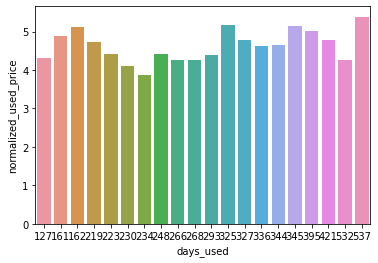

In [13]:
sb.barplot(data=df,x=df["days_used"].head(20),y=df["normalized_used_price"].head(20))

# LET SEE THE SKEWNESS OF THE DATAS

In [14]:
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


screen_size              1.023932
rear_camera_mp           0.786129
front_camera_mp          1.802170
internal_memory          5.798105
ram                      1.069797
battery                  1.333428
weight                   3.235776
release_year             0.322297
days_used               -0.343977
normalized_used_price   -0.532338
normalized_new_price    -0.077026
dtype: float64

# REMOVING SKEWNESS OF THE COLUMN BY REPLACING THE SQUARE ROOT VALUES

In [15]:
df["screen_size"]=np.sqrt(df["screen_size"])

In [16]:
df["screen_size"].skew()

0.27685036389973716

In [17]:
df["front_camera_mp"]=np.sqrt(df["front_camera_mp"])

In [18]:
df["front_camera_mp"].skew()

0.6320140239520274

In [19]:
df["internal_memory"]=np.sqrt(df["internal_memory"])

In [20]:
df["internal_memory"]=np.sqrt(df["internal_memory"])
df["internal_memory"].skew()

1.1609802466220052

In [21]:
df["internal_memory"]=np.sqrt(df["internal_memory"])
df["internal_memory"].skew()

0.16270541853903994

In [22]:
df["battery"]=np.sqrt(df["battery"])

In [23]:
df["battery"].skew()

0.5515533159707923

In [24]:
df["weight"]=np.log(df["weight"]) 
df["weight"].skew()

1.6304954994670686

all the skewness are cleared


# CORRELATION

<AxesSubplot:>

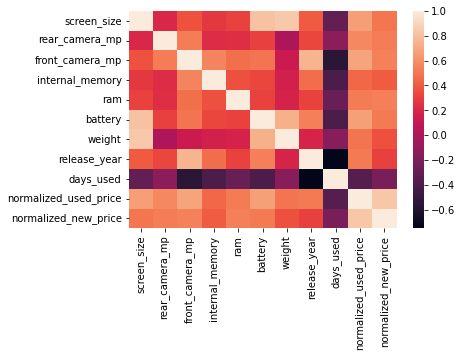

In [25]:
sb.heatmap(df.corr())

In [26]:
df.corr()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
screen_size,1.000000,0.205562,0.365314,0.271500,0.311777,0.810864,0.838559,0.391923,-0.305333,0.651599,0.495226
rear_camera_mp,0.205562,1.000000,0.527437,0.221320,0.228691,0.301468,0.000794,0.327828,-0.133612,0.566872,0.522319
front_camera_mp,0.365314,0.527437,1.000000,0.552461,0.471314,0.490267,0.123831,0.750468,-0.553140,0.680647,0.540835
internal_memory,0.271500,0.221320,0.552461,1.000000,0.362919,0.327860,0.162209,0.462371,-0.399238,0.442549,0.399593
ram,0.311777,0.228691,0.471314,0.362919,1.000000,0.312721,0.173537,0.313846,-0.279739,0.518717,0.530295
battery,0.810864,0.301468,0.490267,0.327860,0.312721,1.000000,0.735315,0.533203,-0.394970,0.658135,0.508123
weight,0.838559,0.000794,0.123831,0.162209,0.173537,0.735315,1.000000,0.182576,-0.151521,0.488696,0.357308
release_year,0.391923,0.327828,0.750468,0.462371,0.313846,0.533203,0.182576,1.000000,-0.750390,0.509790,0.303689
days_used,-0.305333,-0.133612,-0.553140,-0.399238,-0.279739,-0.394970,-0.151521,-0.750390,1.000000,-0.358264,-0.216625
normalized_used_price,0.651599,0.566872,0.680647,0.442549,0.518717,0.658135,0.488696,0.509790,-0.358264,1.000000,0.834496


# VISUAL OF THE DATA SETS AFTER PROCESSING


<Figure size 720x576 with 0 Axes>

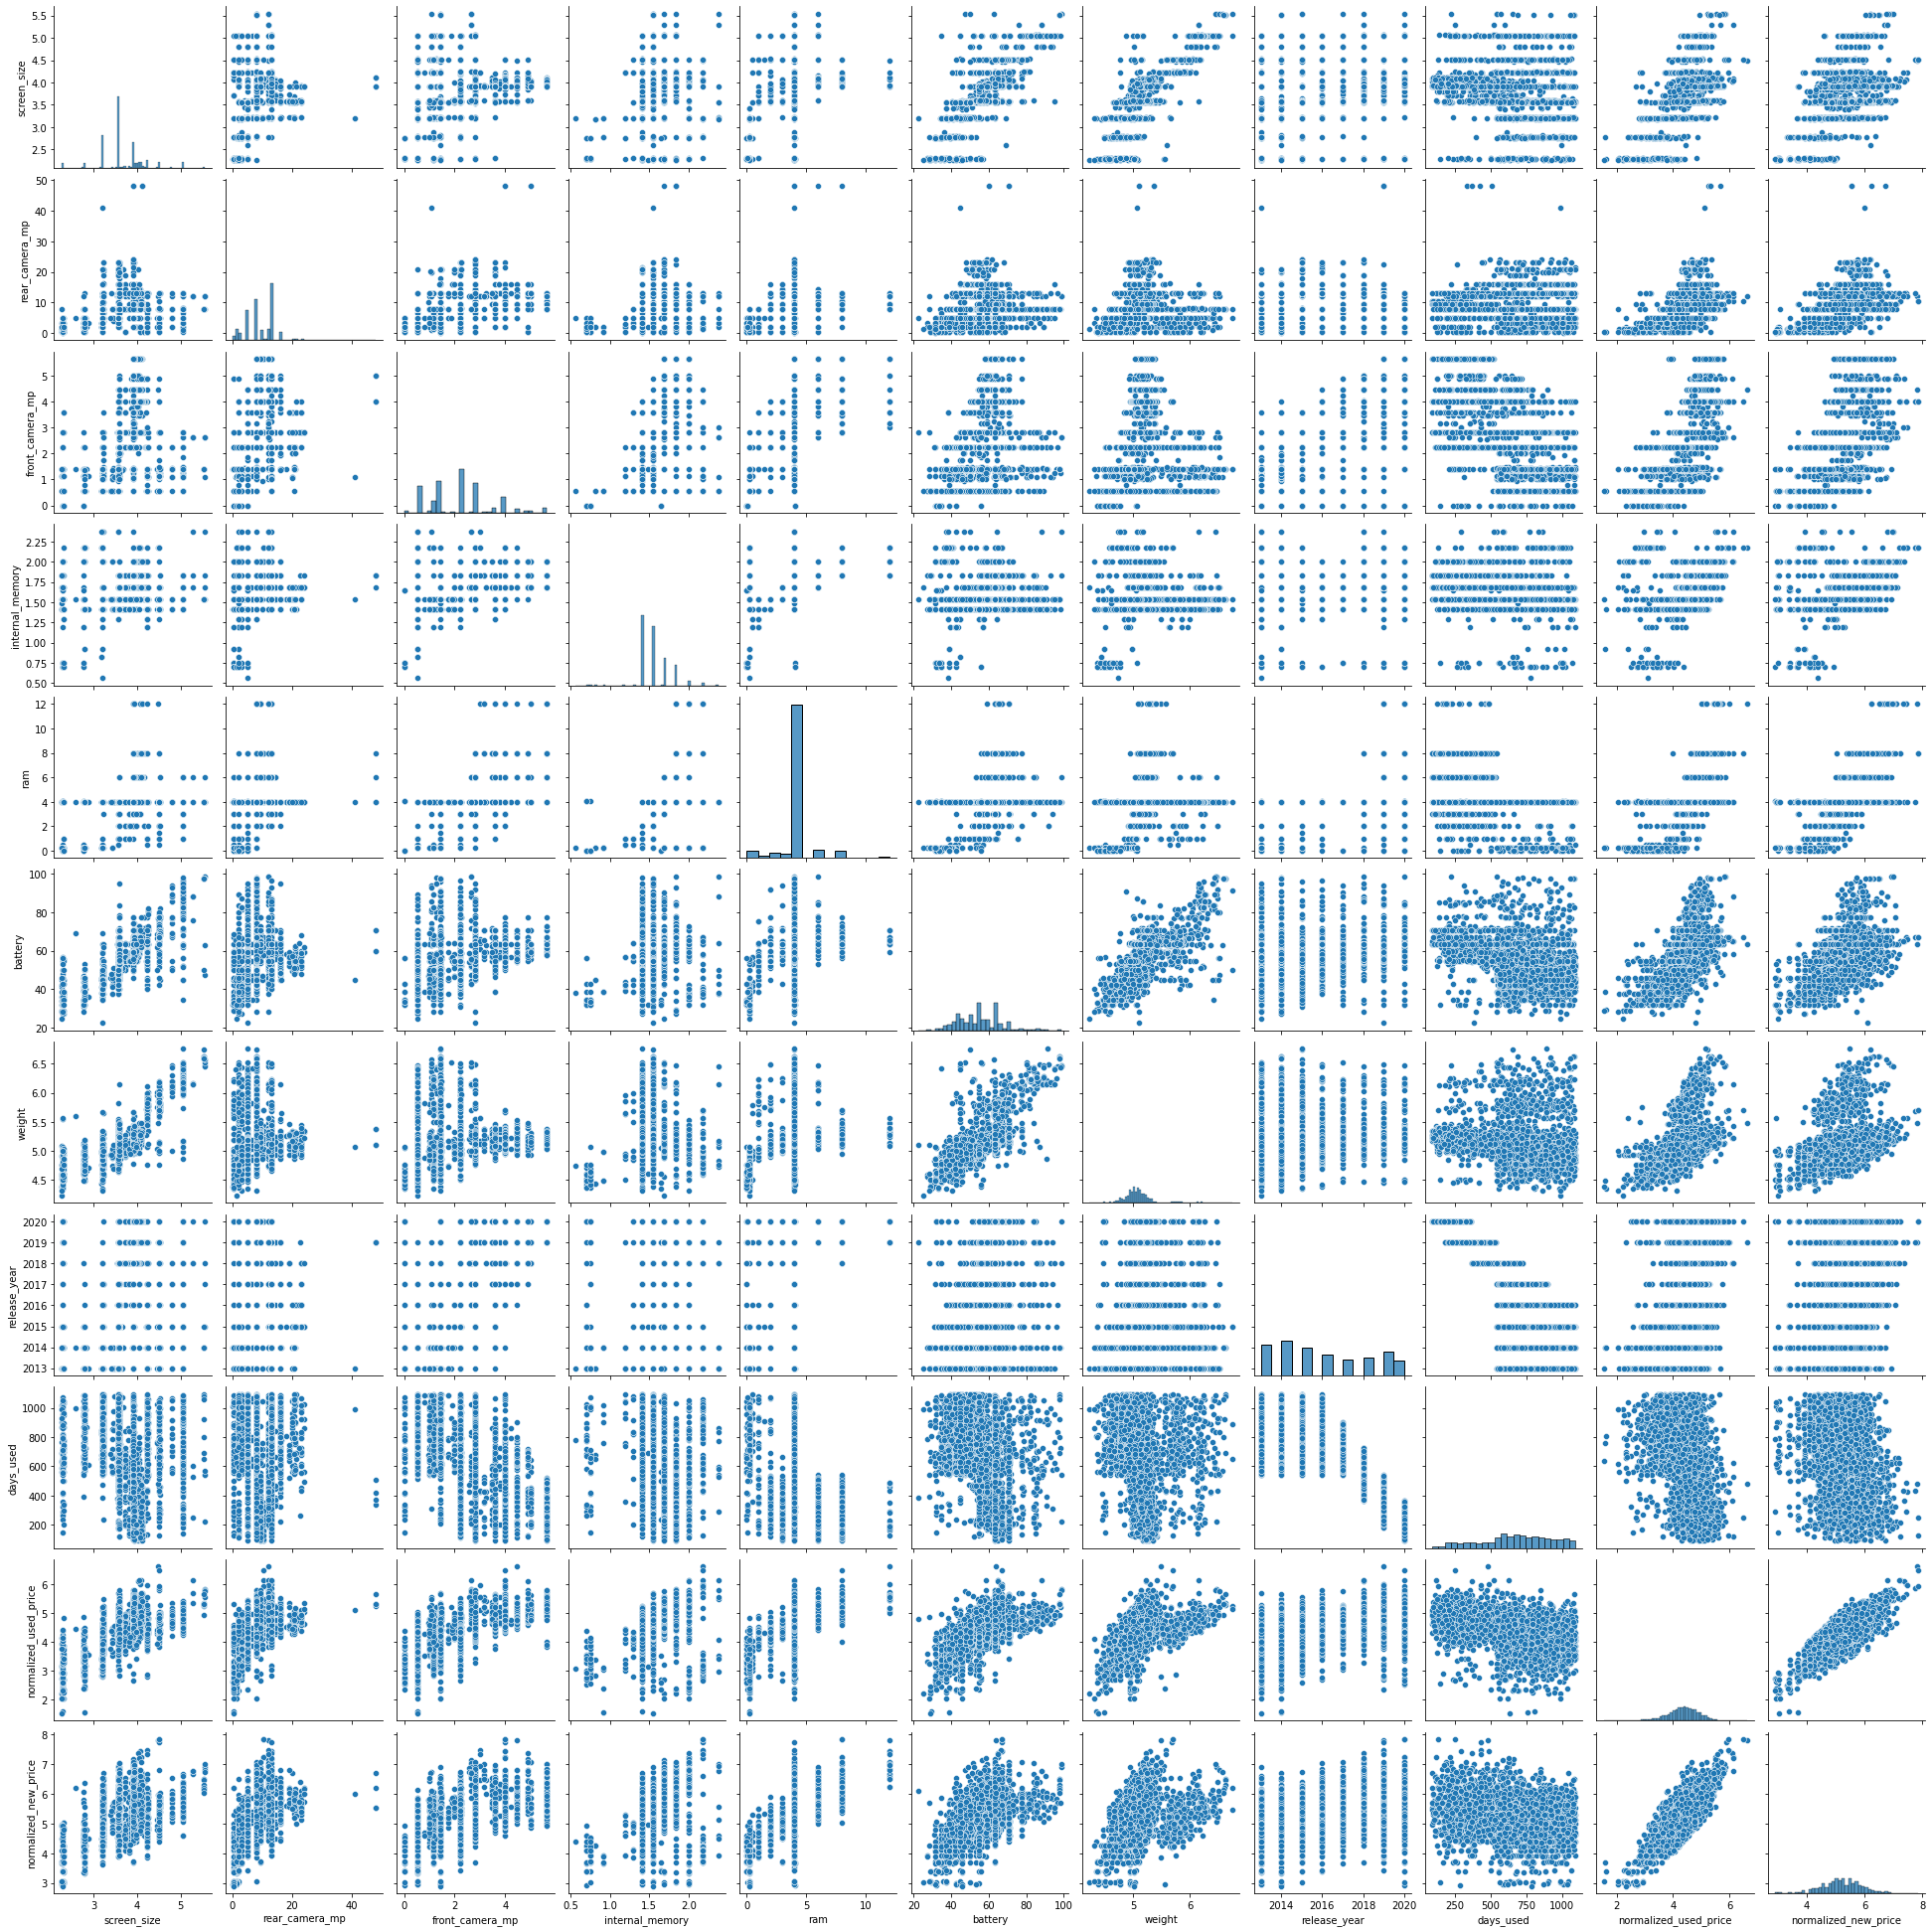

In [27]:
plt.figure(figsize=(10,8))
sb.pairplot(data=df)

# MODEL TRAINING


In [28]:
df["normalized_used_price"].values

array([4.30757245, 5.16209665, 5.11108377, ..., 4.35734965, 4.34976167,
       4.13212193])

**ENCODING THE VALUES OF CATEGORICAL INTO NUMERICAL**

In [29]:
df["device_brand"].unique()

array(['Honor', 'Others', 'HTC', 'Huawei', 'Infinix', 'Lava', 'Lenovo',
       'LG', 'Meizu', 'Micromax', 'Motorola', 'Nokia', 'OnePlus', 'Oppo',
       'Realme', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE', 'Apple', 'Asus',
       'Coolpad', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon', 'Gionee',
       'Google', 'Karbonn', 'Microsoft', 'Panasonic', 'Sony', 'Spice',
       'XOLO'], dtype=object)

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["device_brand"]=le.fit_transform(df["device_brand"])
df["device_brand"]

0       10
1       10
2       10
3       10
4       10
        ..
3449     3
3450     3
3451     1
3452     1
3453     1
Name: device_brand, Length: 3454, dtype: int64

In [31]:
df["os"]=le.fit_transform(df["os"])
df["os"]

0       0
1       0
2       0
3       0
4       0
       ..
3449    0
3450    0
3451    0
3452    0
3453    0
Name: os, Length: 3454, dtype: int64

In [32]:
df["4g"]=le.fit_transform(df["4g"])
df["4g"]

0       1
1       1
2       1
3       1
4       1
       ..
3449    1
3450    1
3451    1
3452    1
3453    1
Name: 4g, Length: 3454, dtype: int64

In [33]:
df["5g"]=le.fit_transform(df["5g"])
df["5g"]

0       0
1       1
2       1
3       1
4       0
       ..
3449    0
3450    0
3451    0
3452    0
3453    0
Name: 5g, Length: 3454, dtype: int64

In [34]:
x=df.iloc[:,:14]
x

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price
0,10,0,3.807887,1,0,13.000000,2.236068,1.681793,3.0,54.954527,4.983607,2020,127,4.307572
1,10,0,4.159327,1,1,13.000000,4.000000,1.834008,8.0,65.574385,5.361292,2020,325,5.162097
2,10,0,4.085340,1,1,13.000000,2.828427,1.834008,8.0,64.807407,5.361292,2020,162,5.111084
3,10,0,5.049752,1,1,13.000000,2.828427,1.681793,6.0,85.146932,6.173786,2020,345,5.135387
4,10,0,3.914077,1,0,13.000000,2.828427,1.681793,3.0,70.710678,5.220356,2020,293,4.389995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,3,0,3.916631,1,0,9.460208,2.828427,1.681793,6.0,70.710678,5.247024,2019,232,4.492337
3450,3,0,3.903844,1,0,13.000000,2.828427,1.834008,8.0,63.245553,5.298317,2018,541,5.037732
3451,1,0,3.974921,1,0,13.000000,2.236068,1.542211,3.0,63.245553,5.105945,2020,201,4.357350
3452,1,0,3.974921,1,0,13.000000,2.236068,1.542211,2.0,63.245553,5.075174,2020,149,4.349762


In [35]:
y=df.iloc[:,14]
y

0       4.715100
1       5.519018
2       5.884631
3       5.630961
4       4.947837
          ...   
3449    6.483872
3450    6.251538
3451    4.528829
3452    4.624188
3453    4.279994
Name: normalized_new_price, Length: 3454, dtype: float64

**TRAIN TEST SPLIT**

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

# GBR IMPLEMENTATION

In [37]:
from sklearn import ensemble
params={'n_estimators':3,'max_depth':3,'learning_rate':1,'criterion':'mse'}
gradient_boosting_regressor_model=ensemble.GradientBoostingRegressor(**params)
gradient_boosting_regressor_model.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:475: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


GradientBoostingRegressor(criterion='mse', learning_rate=1, n_estimators=3)

# PREDICTION OF THE MODEL

In [38]:
y_pred=gradient_boosting_regressor_model.predict(x_test)
y_pred

array([5.07563199, 5.9219227 , 5.70206285, 6.28243556, 3.27638937,
       5.52903235, 5.07563199, 4.73268065, 4.73268065, 4.66487239,
       4.9113741 , 5.29549184, 4.9113741 , 6.14164775, 5.59435447,
       4.89663317, 4.51251544, 5.70206285, 5.84285066, 4.9113741 ,
       4.66487239, 3.48433181, 5.07563199, 5.70206285, 5.03154328,
       5.07563199, 5.37449461, 4.51251544, 6.14164775, 5.37449461,
       6.80292411, 5.29549184, 5.29549184, 5.70206285, 4.51251544,
       5.70206285, 5.70206285, 4.66487239, 4.9113741 , 4.66487239,
       4.9113741 , 5.07563199, 4.19285766, 5.51528243, 5.70206285,
       6.14164775, 5.37449461, 3.48433181, 5.07563199, 6.14164775,
       5.29549184, 5.29549184, 5.07563199, 4.19285766, 4.31752419,
       6.14164775, 5.29549184, 4.73268065, 3.27638937, 5.04899013,
       6.80292411, 6.80292411, 4.9113741 , 4.66487239, 5.29549184,
       5.07563199, 5.29549184, 4.73268065, 6.14164775, 5.70206285,
       5.70206285, 5.70206285, 5.37449461, 5.37449461, 5.70206

# MODEL SCORE/ACCURACY

In [39]:
gradient_boosting_regressor_model.score(x_test,y_pred)

1.0